In [1]:
# Import Modules
import sys,os
sys.path.append(os.getcwd())

from clarifier_plots import ClarifierPlot
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle

In [2]:
# Load the breast cancer classification dataset available
# in the sklearn package
data = load_breast_cancer()
X, y, feature_names = data.data, data.target, data.feature_names
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

# Train a random forest
rf= RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

#Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Train a gradient-boosted tree
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

/anaconda3/envs/deep/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [3]:
c_plt = ClarifierPlot(models={'RandomForest': rf, 'LogisticRegression': lr, 'GradientBoosted': gb}, 
                      examples=X_train, targets=y_train, feature_names=feature_names)

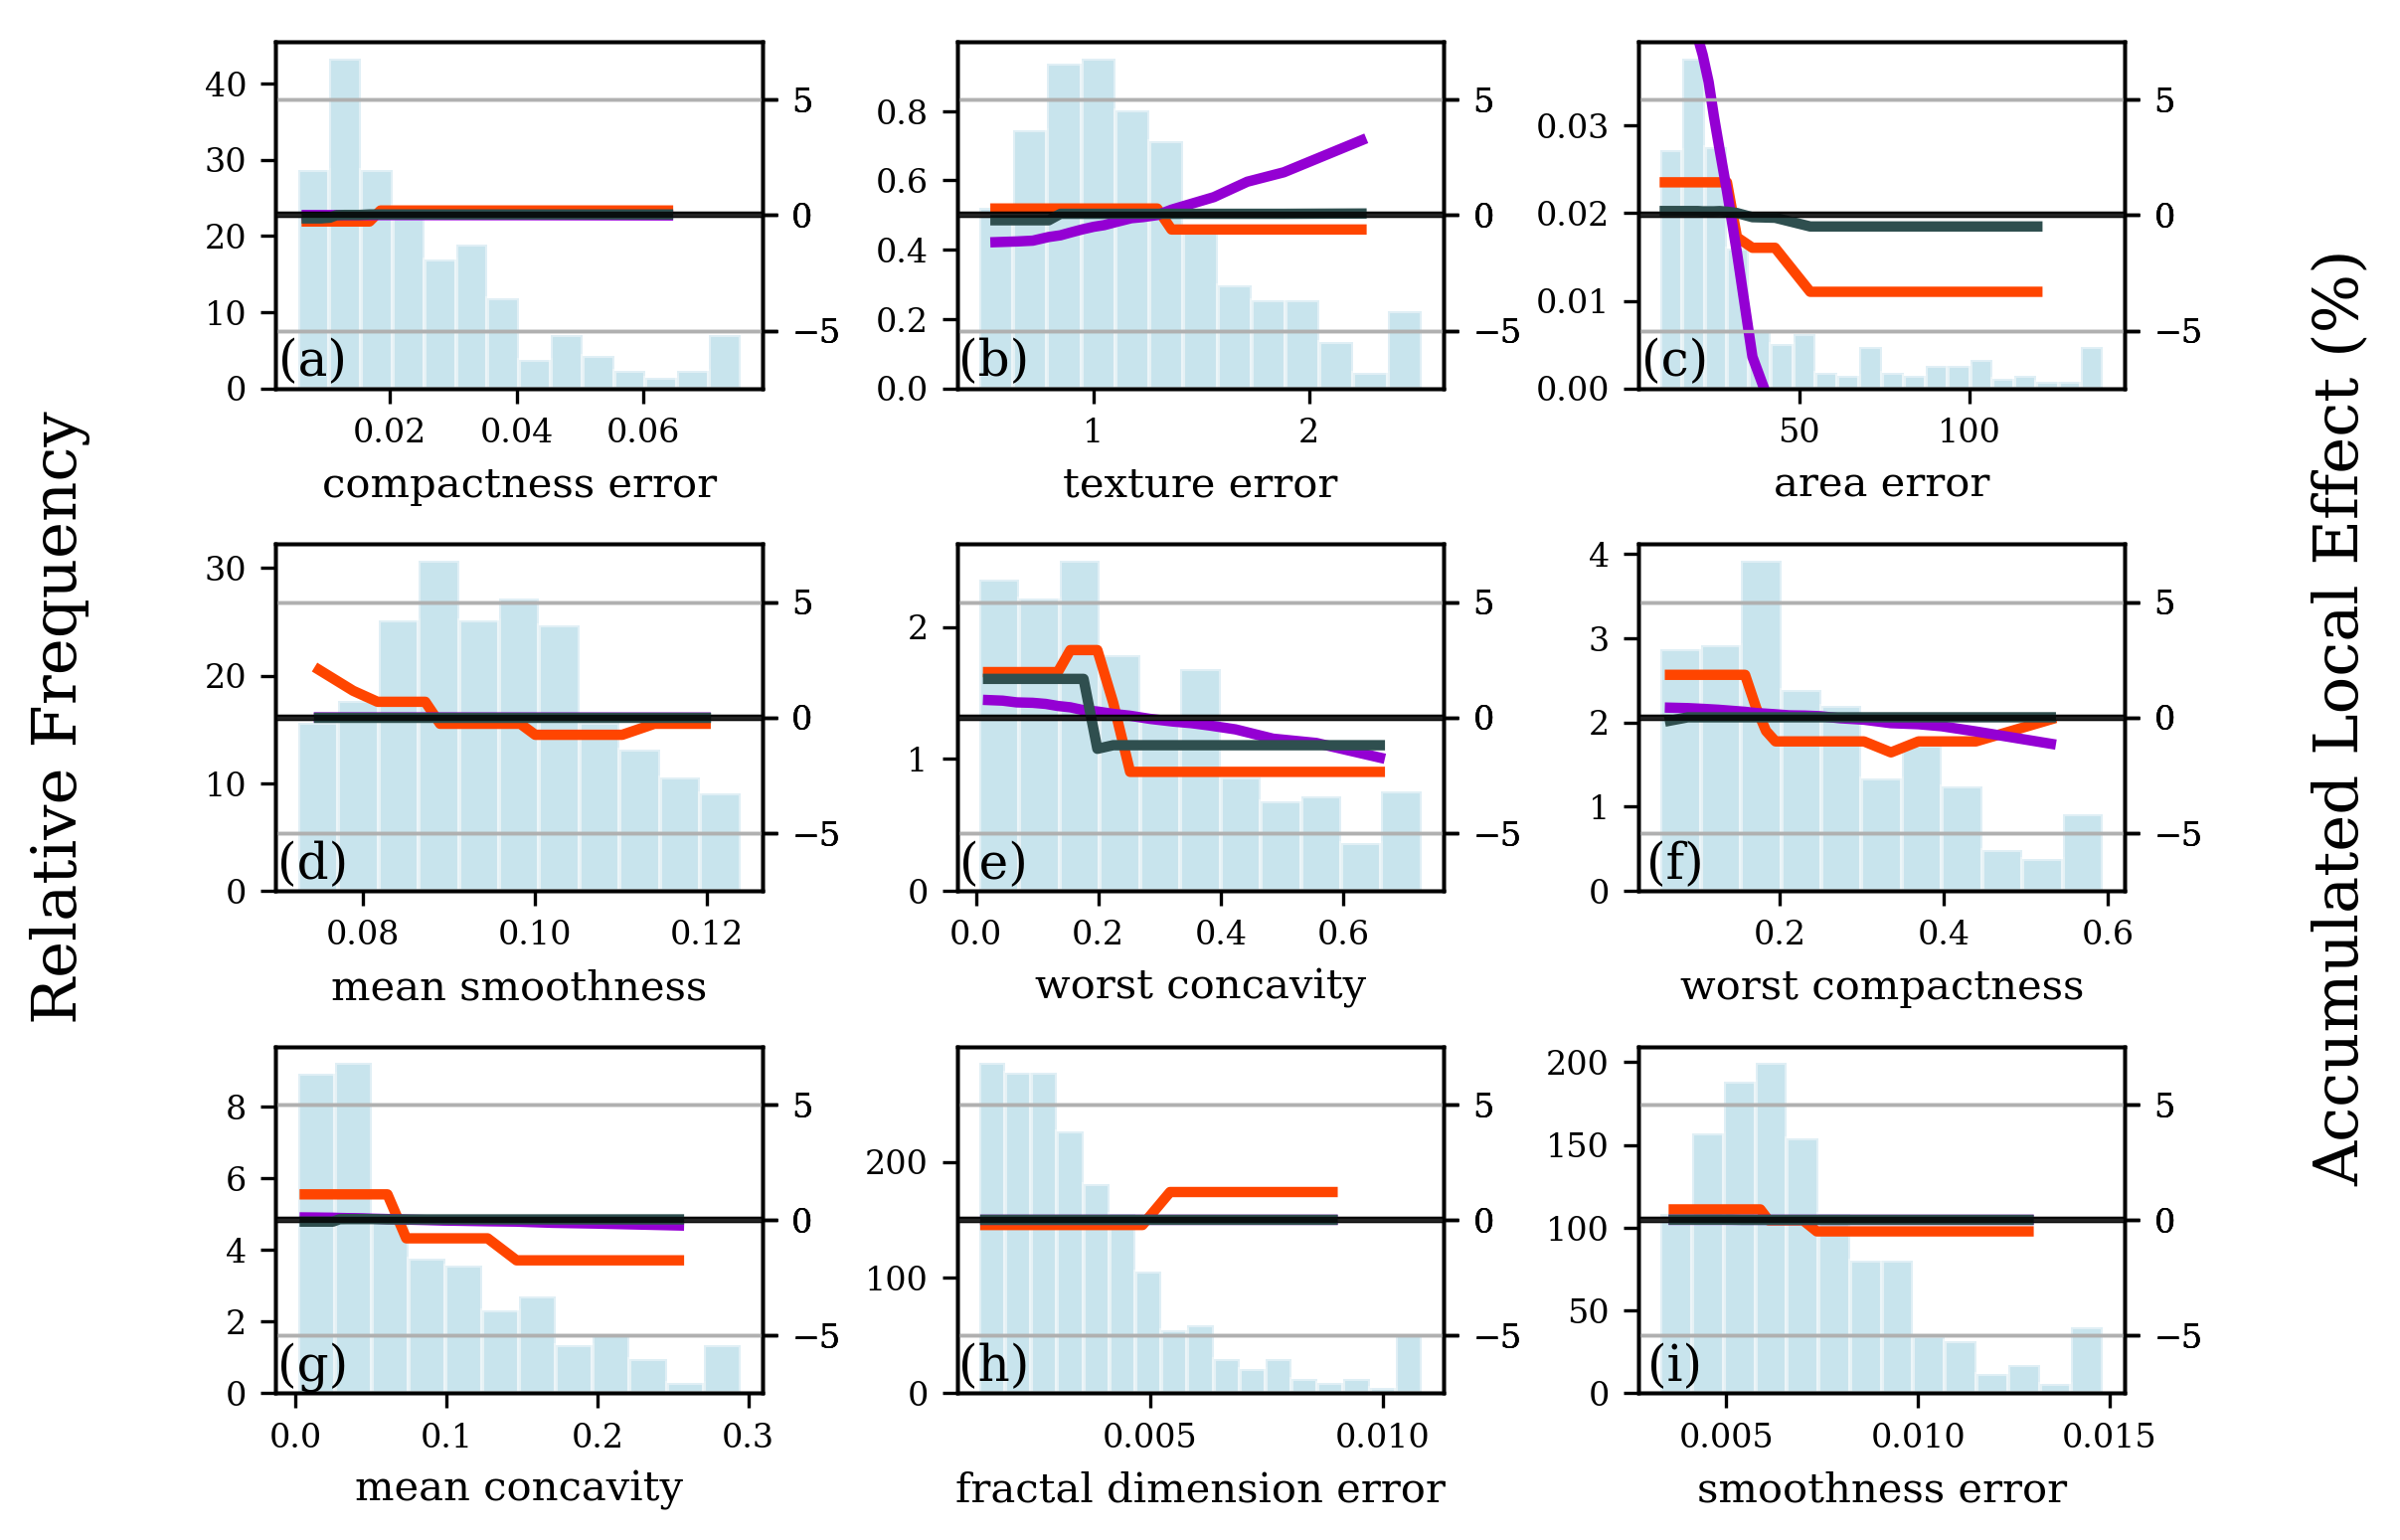

In [5]:
important_vars = ['compactness error', 'texture error', 'area error', 'mean smoothness', 'worst concavity', 'worst compactness', 
                  'mean concavity', 'fractal dimension error', 'smoothness error']
fig, axes = c_plt.plot_ale(important_vars)